In [1]:
# Load the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [2]:
# Load csv file into dataframe (df)
df = pd.read_csv('FAOSTAT_data_en_1-1-2023.csv',encoding_errors='ignore')

# Display first 5 records
df.head()


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1961,1961,tonnes,38049.0,A,Official figure
1,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1962,1962,tonnes,38885.0,A,Official figure
2,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1963,1963,tonnes,40251.0,A,Official figure
3,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1964,1964,tonnes,41566.0,A,Official figure
4,QCL,Crops and livestock products,40,Austria,5510,Production,22241.01,Butter of cow milk,1965,1965,tonnes,44665.0,A,Official figure


# DESCRIPTIVE STATISTICS

## Ireland

In [4]:
df_ireland = df.loc[df["Area"] == 'Ireland']

In [5]:
df_ireland["Value"].mean()

279607.3867837079

In [6]:
df_ireland["Value"].median()

23500.805

In [7]:
df_ireland["Value"].mode()

0    0.0
Name: Value, dtype: float64

In [8]:
# Variance : S²
df_ireland["Value"].var()

674990963988.973

In [9]:
# Standard Deviation : S
df_ireland["Value"].std()

821578.337098157

## Rest of countries

In [10]:
df_not_ireland = df.loc[df["Area"] != 'Ireland']

In [11]:
df_not_ireland["Value"].mean()

254286.1831344106

In [12]:
df_not_ireland["Value"].median()

20000.0

In [13]:
df_not_ireland["Value"].mode()

0    0.0
Name: Value, dtype: float64

In [14]:
# Variance : S²
df_not_ireland["Value"].var()

1534849034055.7605

In [15]:
# Standard Deviation : S
df_not_ireland["Value"].std()

1238890.242941545

# inferential statistics
## Time series analysis 

Text(0.5, 1.0, 'Skim Milk of Cows Ireland Time Series')

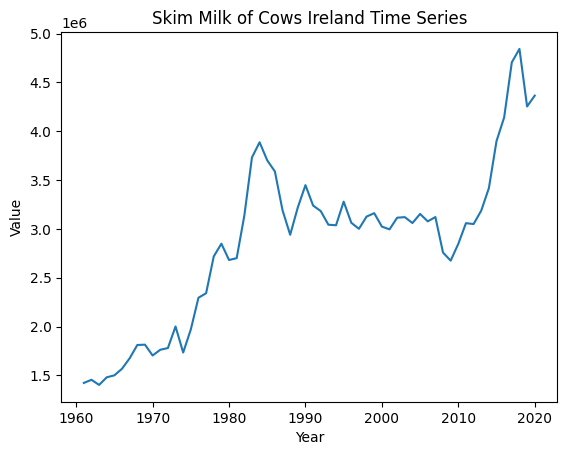

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 
df_ireland = pd.read_csv('TimeSeries_skim_milk_of_cows_ireland.csv')
df_europe = pd.read_csv('TimeSeries_skim_milk_of_cows_europe.csv')

sns.lineplot(df_ireland, x="Year", y="Value")
plt.ylabel('Value')
plt.xlabel('Year')
plt.title("Skim Milk of Cows Ireland Time Series")

Text(0.5, 1.0, 'Skim Milk of Cows Europe Time Series')

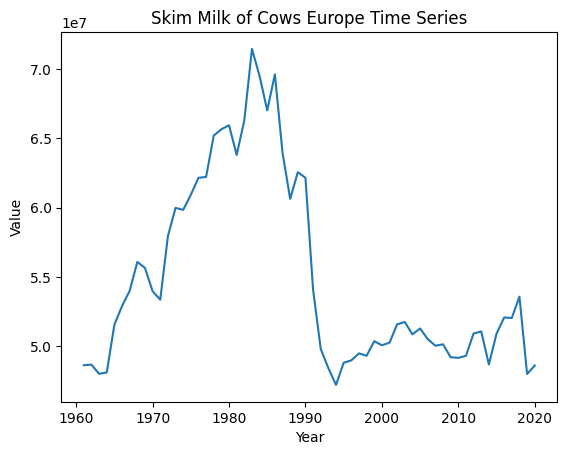

In [24]:
sns.lineplot(df_europe, x="Year", y="Value")
plt.ylabel('Value')
plt.xlabel('Year')
plt.title("Skim Milk of Cows Europe Time Series")

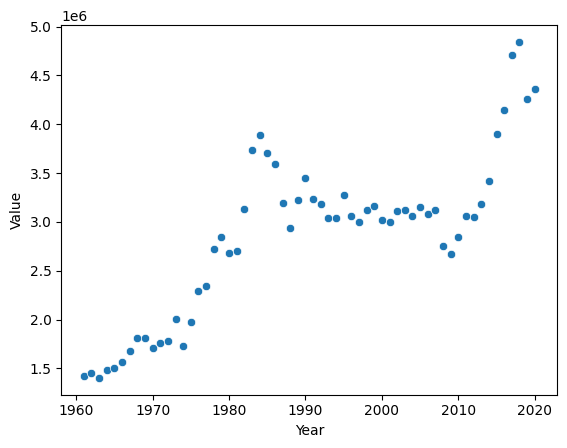

In [25]:
ax = sns.scatterplot(x="Year", y="Value", data=df_ireland)

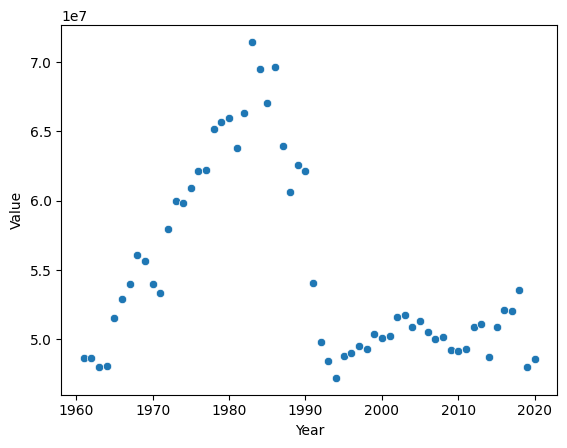

In [33]:
ax = sns.scatterplot(x="Year", y="Value", data=df_europe)

## poisson distribution¶
based on a given St Stephens Green street, what is the probability of a given number of parking bays to be suspended in a given day

If we take the total days for the dataset, and calculate the number of parking bays for a given street during the same period od time we can get the average number of parking bays per day



In [34]:
# Dataset started on.....

Total_Years = df_ireland["Year"].nunique()

In [35]:
print(Total_Years)


60


In [37]:
df_ireland["Value"].sum()

171533112.31

In [41]:
# The averageof value per year
mu = df_ireland["Value"].sum() / Total_Years
print(mu)

2858885.205166667


In [53]:
from scipy.stats import poisson

# mu = average
# size = number of xamples

#generate random values from Poisson distribution with mean=mu and sample size=200
poisson.rvs(mu=mu, size=200)

array([2860298, 2859873, 2857936, 2858760, 2856952, 2858793, 2857141,
       2856933, 2856601, 2857020, 2859482, 2858798, 2859311, 2860500,
       2859799, 2857388, 2860877, 2860041, 2861825, 2858796, 2858461,
       2858714, 2857218, 2856684, 2859934, 2861148, 2857615, 2858596,
       2858103, 2856524, 2855998, 2857330, 2857581, 2860189, 2859208,
       2859506, 2859401, 2857795, 2859247, 2862226, 2859772, 2858696,
       2857607, 2858310, 2858770, 2857708, 2857154, 2857780, 2858084,
       2859209, 2858188, 2857468, 2856419, 2856409, 2861150, 2857401,
       2858348, 2859155, 2860018, 2860602, 2855860, 2857374, 2858635,
       2859293, 2859398, 2861150, 2857872, 2861909, 2855543, 2856810,
       2857146, 2859519, 2860950, 2859498, 2856130, 2857686, 2856889,
       2857365, 2863258, 2861563, 2858145, 2860004, 2856950, 2858131,
       2857103, 2859266, 2860355, 2859410, 2857342, 2859038, 2857595,
       2858140, 2856685, 2857520, 2858360, 2858594, 2857607, 2860308,
       2862026, 2859

In [54]:
# Probability Equal to Zero
from scipy.stats import poisson
# EXACT NUMBER

# mu = average
# k = value we are looking for 

#calculate probability
poisson.pmf(k=0, mu=mu)



0.0

In [55]:
# Probability Less than 2850000
from scipy.stats import poisson

# LESS or EQUAL
#calculate probability
poisson.cdf(k=2850000, mu=mu)


7.309799094249581e-08

In [56]:
# Probability Greater than  2850000 and less than 2860000 
from scipy.stats import poisson

poisson.cdf(k=2860000, mu=mu) - poisson.cdf(k=2850000, mu=mu)

0.7452677293204444

(array([4.70662065e-07, 4.78506432e-06, 2.69061814e-05, 9.86037025e-05,
        1.98227173e-04, 2.27565108e-04, 1.53514277e-04, 5.73423282e-05,
        1.45905240e-05, 2.43175400e-06]),
 array([2852155. , 2853429.8, 2854704.6, 2855979.4, 2857254.2, 2858529. ,
        2859803.8, 2861078.6, 2862353.4, 2863628.2, 2864903. ]),
 <BarContainer object of 10 artists>)

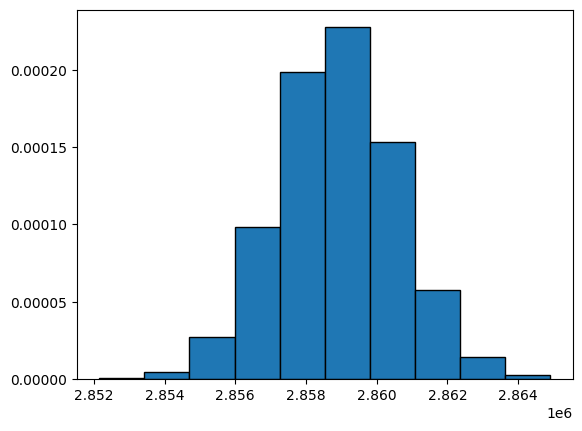

In [57]:
# Plot a Poisson Distribution
from scipy.stats import poisson
import matplotlib.pyplot as plt


#generate Poisson distribution with sample size 10000
x = poisson.rvs(mu=mu, size=10000)

#create plot of Poisson distribution
plt.hist(x, density=True, edgecolor='black')

# parametric and non-parametric inferential statistical 

In [66]:
# Wilcoxon signed-rank test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import wilcoxon
# seed the random number generator
seed(1)
# generate two independent samples
data1 = df_ireland["Value"]
data2 = df_europe["Value"]
# compare samples
stat, p = wilcoxon(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

Statistics=0.000, p=0.000
Different distribution (reject H0)
